# SALES PREDICTION 
### Project by MEGHA MITTAL

### Importing Neccessary Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


### Loading the dataset

In [112]:
data= pd.read_csv('Advertising.csv')

In [113]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [114]:
data.shape

(200, 5)

#### In our dataset, we have 200 rows of data and 5 columns

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### For double checking purpose, verifying there is no missing values

In [116]:
missing_data = data.isnull().sum()
print(missing_data)

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


#### Since there is one column named as "unnamed" which is  unnecessary, so we can drop it out.

In [117]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [118]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Checking is there any duplicated data 

In [119]:
data.duplicated().sum()
# There are no duplicates in the data

0

## Exploratory Data Analysis

In [120]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


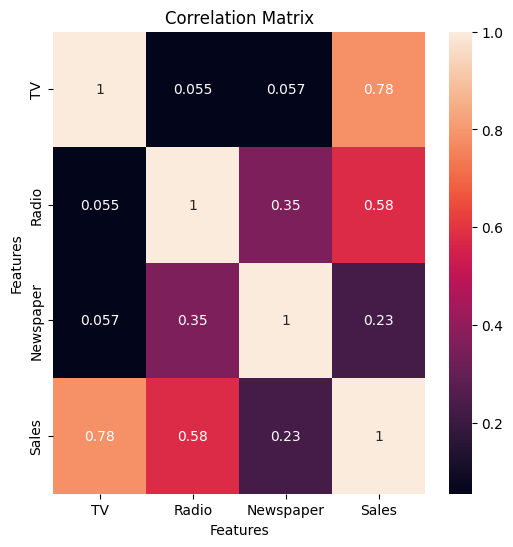

In [121]:
corr_matrix= data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

##### Strongest Correlation: TV advertising and Sales (0.782224). This suggests us that TV advertising has the most significant impact on sales among the three advertising channels. Overall, if amount spent on TV advertising increases, sales also tend to increase.
##### Moderate Correlation: Radio advertising and Sales (0.576223). Radio also has a noticeable impact on sales, but less so than TV.
##### Weakest Correlation: Newspaper advertising and Sales (0.228299). Newspaper advertising seems to have the least impact on sales.

### Scatter-Plot

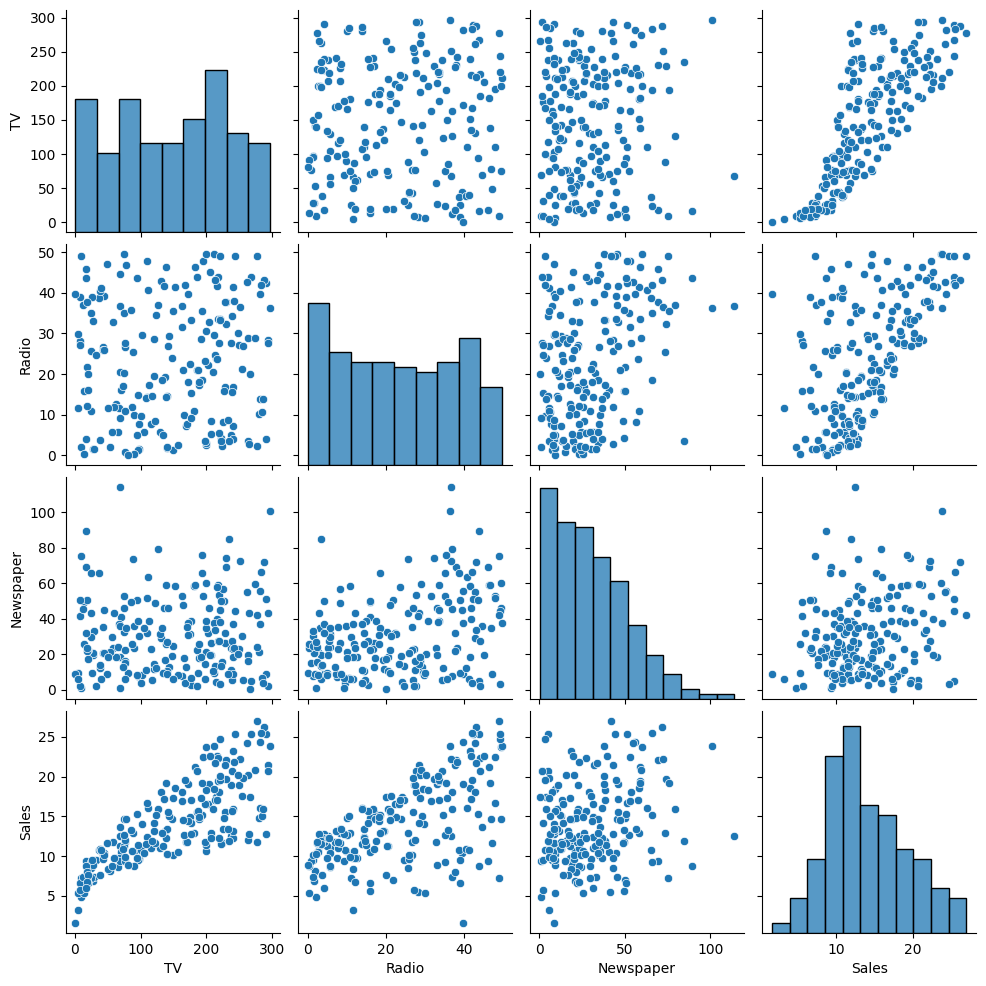

In [122]:
sns.pairplot(data)
plt.show()

In [123]:
numerical_columns= data.columns.to_list()
numerical_columns

['TV', 'Radio', 'Newspaper', 'Sales']

### Histogram and Boxplot

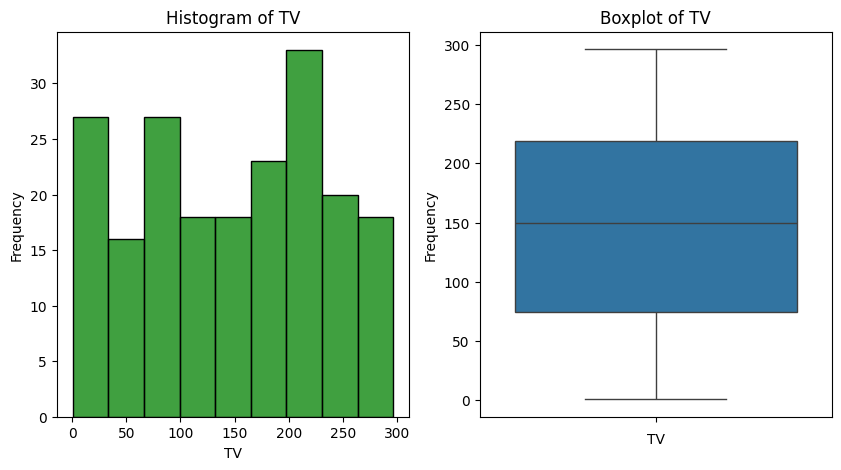

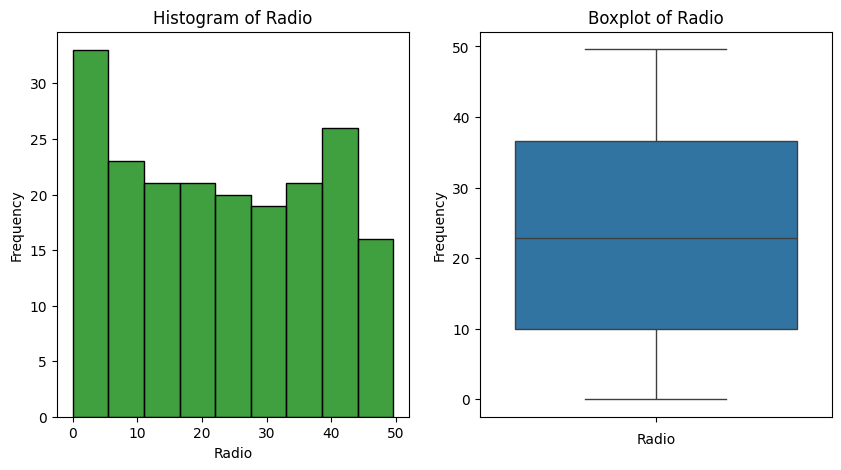

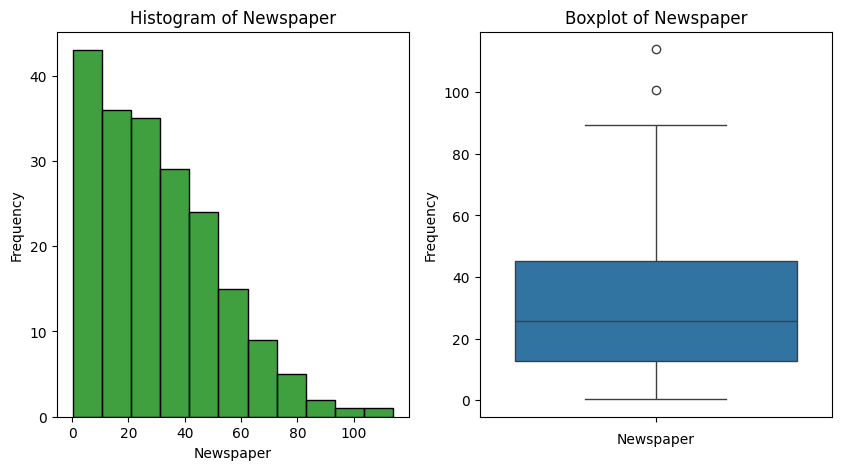

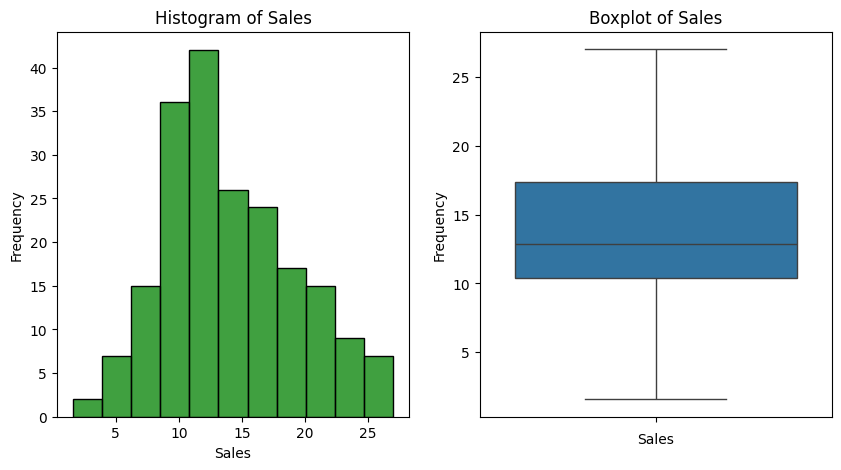

In [124]:
for col in numerical_columns:
    fig, ax= plt.subplots(1,2, figsize=(10,5))

    sns.histplot(data[col],kde=False, color= 'green', ax=ax[0])
    ax[0].set_title('Histogram of {}'.format(col))
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Frequency')

    sns.boxplot(data[col], ax=ax[1])
    ax[1].set_title('Boxplot of {}'.format(col))
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Frequency')
    plt.show()
    

## Feature Scaling

In [125]:
scalar= StandardScaler()
scaled_data= scalar.fit_transform(data)
scaled_data

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

### Splitting into target features and other data columns

In [126]:
target= data['Sales']
data= data.drop(columns=['Sales'], axis=1)

In [127]:
target

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [128]:
data

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


## Splitting the data into training and testing data

In [129]:
x_train, x_test, y_train, y_test= train_test_split(data, target, test_size=0.2, random_state=42)

In [130]:
x_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


## Linear Regression Model

In [131]:
from sklearn.linear_model import LinearRegression

## Model Training

In [132]:
Linear_reg= LinearRegression()
Linear_reg.fit(x_train, y_train)

LinearRegression()

In [133]:
y_pred_train= Linear_reg.predict(x_train)
y_pred_test= Linear_reg.predict(x_test)

## Model Evaluation

In [134]:
training_error_mse= mean_squared_error(y_train, y_pred_train)
testing_error_mse= mean_squared_error(y_test, y_pred_test)
training_error_r2= r2_score(y_train, y_pred_train)
testing_error_r2= r2_score(y_test, y_pred_test)

### Printing the metric

In [135]:
print(f"Training MSE: {training_error_mse:.4f}")
print(f"Testing MSE: {testing_error_mse:.4f}")
print(f"Training R2 Score: {training_error_r2:.4f}")
print(f"Testing R2 Score: {testing_error_r2:.4f}")

Training MSE: 2.7051
Testing MSE: 3.1741
Training R2 Score: 0.8957
Testing R2 Score: 0.8994


## KNN

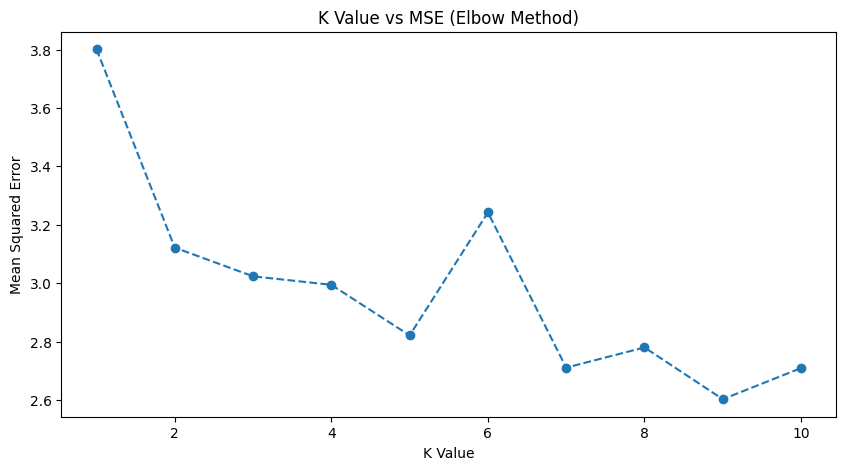

In [136]:
mse_values, r2_values= [], []
max_neighbor= 10
for k in range (1,max_neighbor+1):
    knn= KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred= knn.predict(x_test)
    
    mse_values.append(mean_squared_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.plot(range(1,max_neighbor+1), mse_values, marker='o', linestyle='dashed')
plt.title('K Value vs MSE (Elbow Method)')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.show()


In [137]:
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 9


## Training the model with optimal K value

In [138]:
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=9)

### Evaluation of KNN model

In [139]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

### Printing up the metric values

In [140]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 2.151917438271605
Testing MSE: 2.6027777777777787
Training R2 Score: 0.9170305098743418
Testing R2 Score: 0.9175386111482385


### Decision TREE

### Model Fitting/Training

In [141]:
dt_regressor= DecisionTreeRegressor(random_state=20)
dt_regressor.fit(x_train, y_train)
y_pred_train= dt_regressor.predict(x_train)


### Evaluation of the model

In [142]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 2.709345
R2 Score: 0.9141623409089784


### Plotting the results

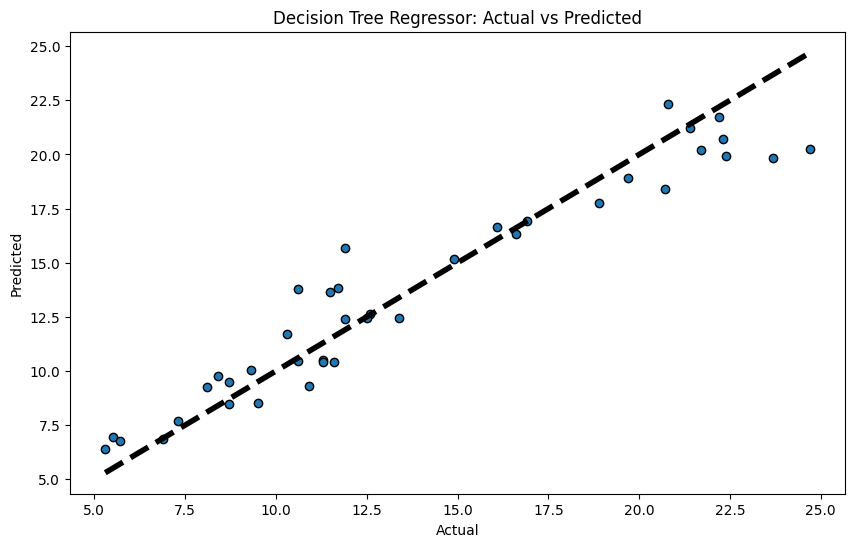

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.show()

## Random Forest

### Fitting

In [144]:
rf= RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf= rf.predict(x_test)

### Evaluation of the Model

In [145]:
mse= mean_squared_error(y_test, y_pred_rf)
r2= r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')    


Mean Squared Error: 0.5907322499999988
R2 Score: 0.9812843792541843


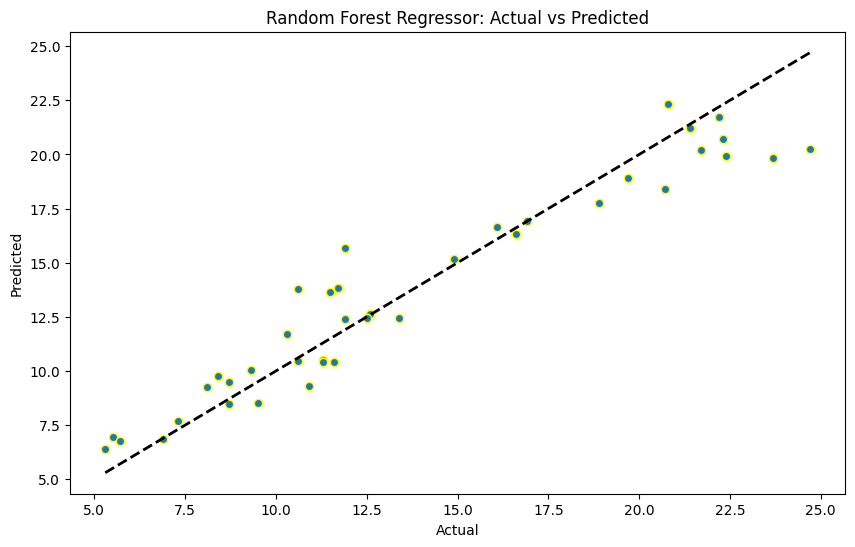

In [150]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(1, 1, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.show()

## Analysis and Conclusion

### Best Model:

The Random Forest Regressor is the best performing model for sales prediction in this scenario. It has the lowest error (MSE) and the highest goodness-of-fit (R2 Score), indicating that it captures the variability in the data very well.

### Moderately Performing Models:

The Decision Tree Regressor and KNN Regressor perform moderately well. The Decision Tree has a higher error and lower R2 compared to Random Forest, while KNN has a balanced performance between training and testing but still does not outperform Random Forest.

### Least Effective Model:

Linear Regression performs the worst in this comparison. Its higher MSE and lower R2 scores suggest that it is unable to model the relationships in the data as effectively as the other models.